In [11]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile('./MeatFreshness.zip', 'r')
zip_ref.extractall('tmp/data')

zip_ref.close()

# Directory with training fresh meat pictures
train_meat_dir = os.path.join('tmp/data/MeatFreshness/Training')
train_frmeat_dir = os.path.join('tmp/data/MeatFreshness/Training/Fresh')
# Directory with training half fresh meat pictures
train_hfmeat_dir = os.path.join('tmp/data/MeatFreshness/Training/HalfFresh')
# Directory with training spoiled meat pictures
train_spmeat_dir = os.path.join('tmp/data/MeatFreshness/Training/Spoiled')

# Directory with training fresh meat pictures
val_meat_dir = os.path.join('tmp/data/MeatFreshness/Validation')
val_frmeat_dir = os.path.join('tmp/data/MeatFreshness/Validation/Fresh')
# Directory with training half fresh meat pictures
val_hfmeat_dir = os.path.join('tmp/data/MeatFreshness/Validation/HalfFresh')
# Directory with training spoiled meat pictures
val_spmeat_dir = os.path.join('tmp/data/MeatFreshness/Validation/spoiled')

In [37]:
train_frmeat = os.listdir(train_frmeat_dir)
print(train_frmeat[:10])

train_hfmeat = os.listdir(train_hfmeat_dir)
print(train_hfmeat[:10])

train_spmeat = os.listdir(train_spmeat_dir)
print(train_spmeat[:10])

val_frmeat = os.listdir(val_frmeat_dir)
print(val_frmeat[:10])

val_hfmeat = os.listdir(val_hfmeat_dir)
print(val_hfmeat[:10])

val_spmeat = os.listdir(val_spmeat_dir)
print(val_spmeat[:10])

['FRESH-17-_JPG.rf.c76371a6595c1b0bf195f402aef0ac60.jpg', 'FRESH-221-_JPG.rf.00abd4ce3bfde74e20c09c7bbf88d686.jpg', 'FRESH-108-_JPG.rf.8109de5fe39e80699ac3e5e8f8ff771a.jpg', 'FRESH-216-_JPG.rf.f6de3bed77a8364997b08c2910c54096.jpg', 'FRESH-85-_JPG.rf.afa8c63624bc6c997198f9c42eeacdfe.jpg', 'FRESH-16-_JPG.rf.5ea80d5edb5a1017c9ccc54ae793a0c8.jpg', 'FRESH-190-_JPG.rf.5b7c4fac61a0754d48107654d39a6657.jpg', 'FRESH-92-_JPG.rf.725916a9817264c2c1b624929acb3eff.jpg', 'FRESH-32-_JPG.rf.8197cef9ba25f379f8d02cd065fcbbe5.jpg', 'FRESH-61-_JPG.rf.f03d1ea428ba37f0db33d85a1e7f7b74.jpg']
['HALF-FRESH-125-_JPG.rf.36ee728bd417206d71838eb8e8fd075b.jpg', 'HALF-FRESH-250-_JPG.rf.2aa6e8522f4443cf1d010f6395db5d1d.jpg', 'HALF-FRESH-27-_JPG.rf.24d1e63431c93166966ffbe629a42a20.jpg', 'HALF-FRESH-107-_JPG.rf.d9432f4f20c0f6ed97be904eb670bca0.jpg', 'HALF-FRESH-252-_JPG.rf.b6f1d862445a48edd54226a71cce5415.jpg', 'HALF-FRESH-3-_JPG.rf.d722f679a8e3359a076d91ac12c13e9c.jpg', 'HALF-FRESH-132-_JPG.rf.a1c99ce841e0555ab96aa8bbc

In [38]:
print('total training fresh meat images:', len(os.listdir(train_frmeat_dir)))
print('total training half fresh meat images:', len(os.listdir(train_hfmeat_dir)))
print('total training spoiled meat images: ', len(os.listdir(train_spmeat_dir)))
print('\n')
print('total validation fresh meat images:', len(os.listdir(val_frmeat_dir)))
print('total validation half fresh meat images:', len(os.listdir(val_hfmeat_dir)))
print('total validation spoiled meat images:', len(os.listdir(val_spmeat_dir)))

total training fresh meat images: 210
total training half fresh meat images: 210
total training spoiled meat images:  210


total validation fresh meat images: 90
total validation half fresh meat images: 90
total validation spoiled meat images: 90


In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

ValueError: ignored

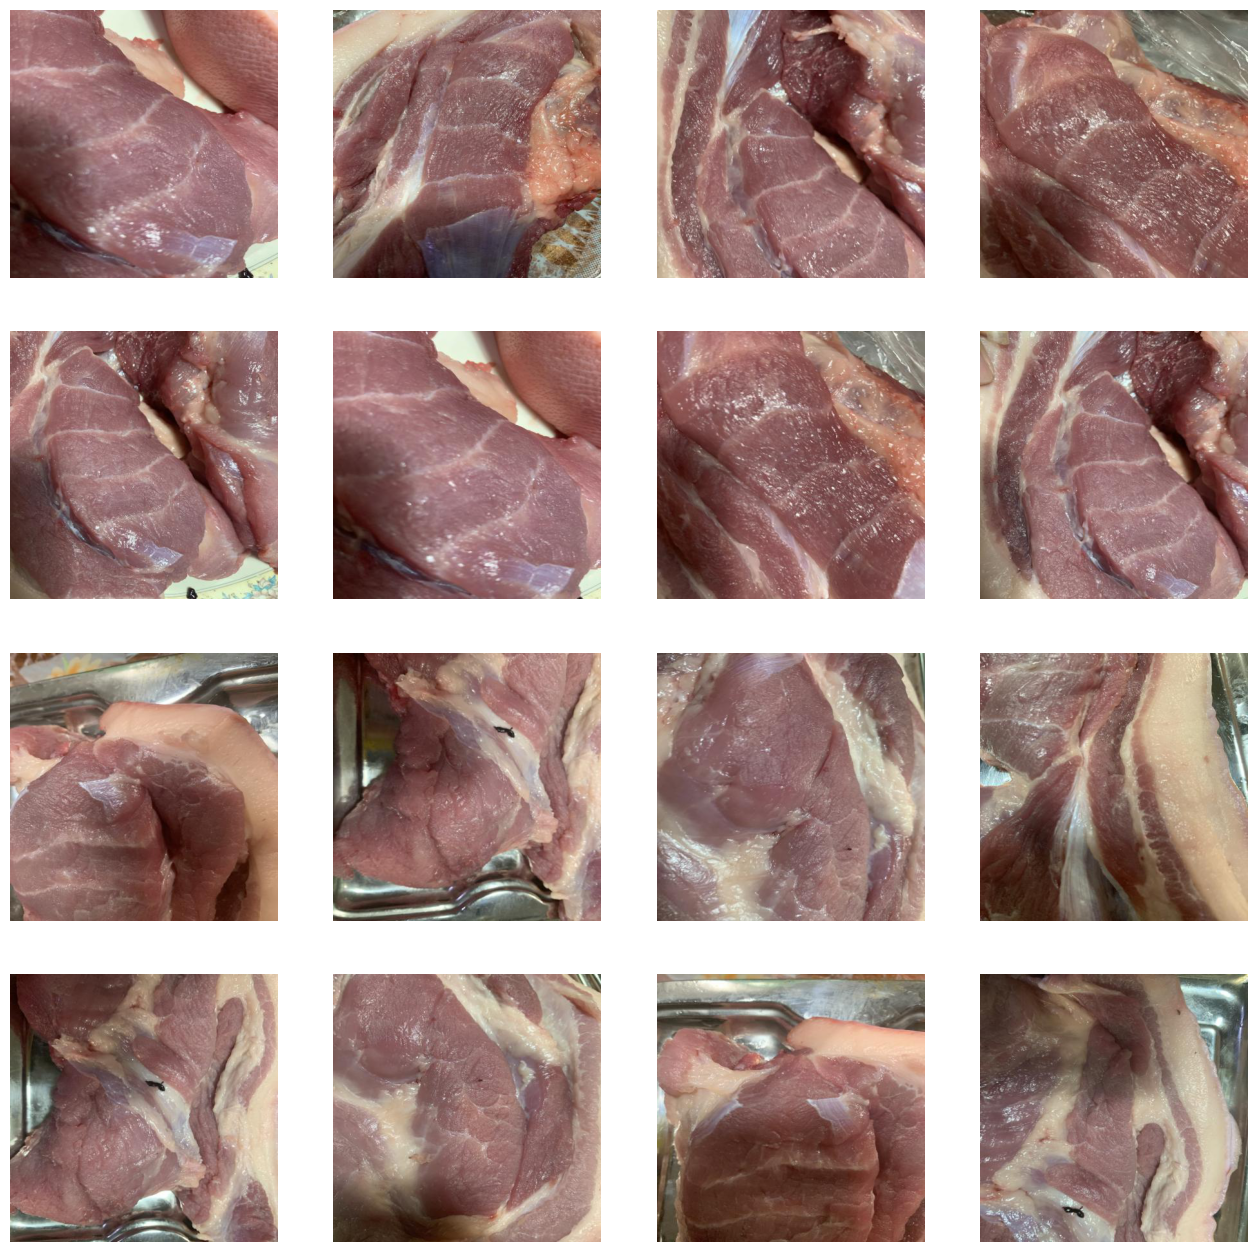

In [20]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_frmeat_pix = [os.path.join(train_frmeat_dir, fname) 
                for fname in train_frmeat[pic_index-8:pic_index]]
next_hfmeat_pix = [os.path.join(train_hfmeat_dir, fname) 
                for fname in train_hfmeat[pic_index-8:pic_index]]
next_spmeat_pix = [os.path.join(train_spmeat_dir, fname) 
                for fname in train_spmeat[pic_index-8:pic_index]]

for i, img_path in enumerate(next_frmeat_pix+next_hfmeat_pix+next_spmeat_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#BUILD MODEL

In [21]:
import tensorflow as tf

In [22]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

#SET TRAINING PARAMETER

In [45]:
#from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate =0.0001),
              metrics=['accuracy'])

In [46]:
#Callback Fuction for Handle Overfitting
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs = {}):
        if epoch >= 10 and logs.get("accuracy") - logs.get("val_accuracy") >= 0.1:
            print("Model tends to be overfitting, then Stop It")
            self.model.stop_training = True
        elif logs.get("accuracy") > 0.9:
            print("Model tends to be overfitting, then Stop It.")
            self.model.stop_training = True
callback = myCallback()

#TRAINING

In [48]:
history = model.fit(
      train_generator,  
      epochs=5,
      batch_size=32,
      validation_data = validation_generator,
      callbacks = [callback,],
      verbose = 1)

Epoch 1/5
5/5 [==============================] - 55s 11s/step - loss: 0.9107 - accuracy: 0.5476 - val_loss: 0.9966 - val_accuracy: 0.4926
Epoch 2/5
5/5 [==============================] - 58s 12s/step - loss: 0.8258 - accuracy: 0.6635 - val_loss: 0.9556 - val_accuracy: 0.6000
Epoch 3/5
5/5 [==============================] - 58s 12s/step - loss: 0.7595 - accuracy: 0.7857 - val_loss: 0.9187 - val_accuracy: 0.5963
Epoch 4/5
5/5 [==============================] - 58s 12s/step - loss: 0.6756 - accuracy: 0.8016 - val_loss: 0.8927 - val_accuracy: 0.5963
Epoch 5/5
5/5 [==============================] - 53s 11s/step - loss: 0.5998 - accuracy: 0.7984 - val_loss: 0.8845 - val_accuracy: 0.6222


#SAVE MODEL TO .H5

In [55]:
model.save("MeatFreshness_classify.h5")

In [56]:
my_model = tf.keras.models.load_model("MeatFreshness_classify.h5")

#PREDICT IMAGE FROM FOLDER


Saving HALF-FRESH-448-_JPG.rf.8d8f3f769ff5fb1b9b2c762b7f706c30.jpg to HALF-FRESH-448-_JPG.rf.8d8f3f769ff5fb1b9b2c762b7f706c30.jpg
1/1 [==============================] - 0s 42ms/step
Prediction is : HalfFresh


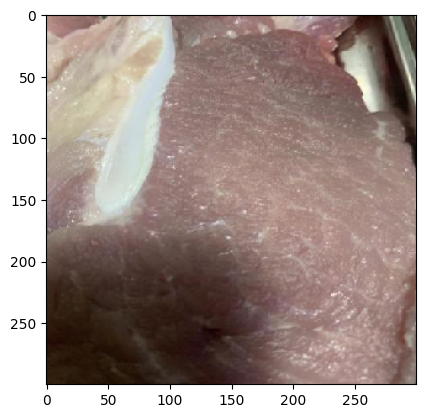

['Fresh', 'HalfFresh', 'Spoiled']
[[0.3050983 0.7278315 0.454409 ]]


In [67]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  pred = my_model.predict(images)
  classes = list(train_generator.class_indices.keys())
  print(f"Prediction is : {classes[np.argmax(pred)]}")
  plt.imshow(img)
  plt.show()

  print(classes)
  print(pred)
  """
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.7:
    print(fn + " is a fresh meat!")
  elif classes[0]>0.5 and classes[0]<0.7:
    print(fn + " is a half fresh meat!")
  else:
    print(fn + "is a spoiled meat")
"""

#GAGAL

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'tmp/data/MeatFreshness/Training',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='categorical')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'tmp/data/MeatFreshness/Validation',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='categorical')

Found 630 images belonging to 3 classes.
Found 270 images belonging to 3 classes.


In [44]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=5,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/5
5/8 [=================>............] - ETA: 28s - loss: 1.3887 - accuracy: 0.4317

8/8 [==============================] - 60s 7s/step - loss: 1.3887 - accuracy: 0.4317 - val_loss: 1.0710 - val_accuracy: 0.4453
